In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd
%matplotlib inline

/Users/hqlgree2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


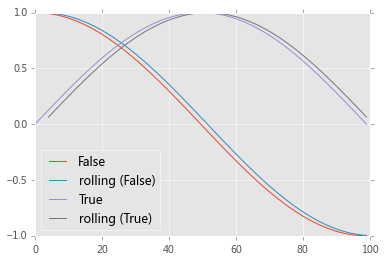

In [2]:
# http://stackoverflow.com/questions/15465645/plotting-results-of-pandas-groupby
sin = np.sin
cos = np.cos
pi = np.pi
N = 100

x = np.linspace(0, pi, N)
a = sin(x)
b = cos(x)

df = pd.DataFrame({
    'A': [True]*N + [False]*N,
    'B': np.hstack((a,b))
    })

for key, grp in df.groupby(['A']):
    plt.plot(grp['B'], label=key)
    grp['D'] = pd.rolling_mean(grp['B'], window=5)    
    plt.plot(grp['D'], label='rolling ({k})'.format(k=key))
plt.legend(loc='best')    
plt.show()

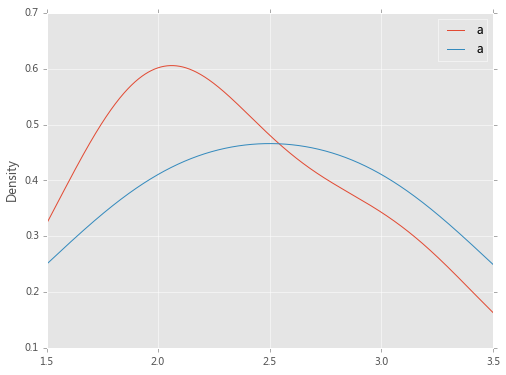

In [3]:
# http://stackoverflow.com/questions/28293028/plotting-grouped-data-in-same-plot-using-pandas
p_df = pd.DataFrame({"class": [1,1,2,2,1], "a": [2,3,2,3,2]})
fig, ax = plt.subplots(figsize=(8,6))
bp = p_df.groupby('class').plot(kind='kde', ax=ax)

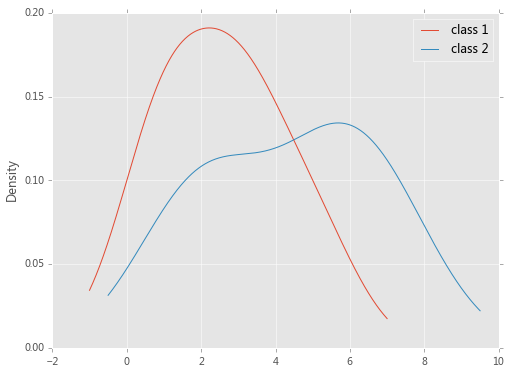

In [4]:
classes = ["class 1"] * 5 + ["class 2"] * 5
vals = [1,3,5,1,3] + [2,6,7,5,2]
p_df = pd.DataFrame({"class": classes, "vals": vals})

fig, ax = plt.subplots(figsize=(8,6))
for label, df in p_df.groupby('class'):
    df.vals.plot(kind="kde", ax=ax, label=label)
plt.legend()

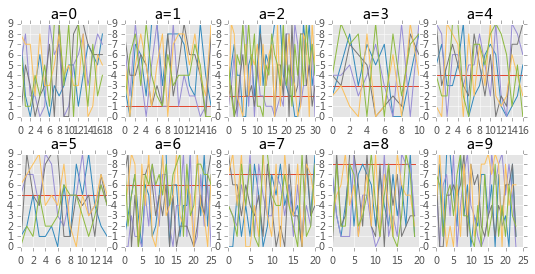

In [7]:
# http://stackoverflow.com/questions/29975835/how-to-create-pandas-groupby-plot-with-subplots
from numpy.random import randint

df = pd.DataFrame(randint(0,10,(200,6)),columns=list('abcdef'))
grouped = df.groupby('a')
rowlength = grouped.ngroups/2                         # fix up if odd number of groups
fig, axs = plt.subplots(figsize=(9,4), 
                        nrows=2, ncols=rowlength,     # fix as above
                        gridspec_kw=dict(hspace=0.4)) # Much control of gridspec

targets = zip(grouped.groups.keys(), axs.flatten())
for i, (key, ax) in enumerate(targets):
    ax.plot(grouped.get_group(key))
    ax.set_title('a=%d'%key)
ax.legend()
plt.show()